<a href="https://colab.research.google.com/github/oldistic/fishify/blob/machine-learning/FishiFy_CapstoneProejct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mounted Google Drive**

In [32]:
import pathlib

from google.colab import drive
drive.mount('/content/drive')

data_dir = "/content/drive/MyDrive/"
data_dir = pathlib.Path(data_dir)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
%cd /content/drive/MyDrive/datasetnthn
!ls

/content/drive/.shortcut-targets-by-id/1eMwDekI6Bi8LfMhdUaDfvAoi5dDzXfqY/datasetnthn
 543_jpg.rf.a729ac58415545c4c4597d878331c590.jpg  'Model15 desember'   model.tflite   valid
 FFFFFFFFFFFFFFF.ipynb				   model.h5	       train	      Validation
 model						   model.png	       Training


#**Data Processing**

In [34]:
import os

file_path ="/content/drive/MyDrive/datasetnthn/"
class_names = sorted(os.listdir(file_path+'train'))

for class_name in class_names:
    class_path = os.path.join(file_path+'train', class_name)
    class_files = os.listdir(class_path)
    print(f'total training {class_name}', len(class_files))
    print(class_files[:5])
    print('\n=========================================================\n')

total training ikan-bawal 250
['ikan_bawal (75).jpg', 'ikan_bawal (81).jpg', 'ikan_bawal (85).jpg', 'ikan_bawal (66).jpg', 'ikan_bawal (72).jpg']


total training ikan-belut 250
['ikan_belut (14).jpg', 'ikan_belut (34).jpg', 'ikan_belut (33).jpg', 'ikan_belut (83).jpg', 'ikan_belut (98).jpg']


total training ikan-gurame 250
['gurame_98.jpg', 'ikan_gurame (78).jpg', 'ikan_gurame (44).jpg', 'ikan_gurame (25).jpg', 'ikan_gurame (24).jpg']


total training ikan-kembung 253
['ikan_kembung (36).jpg', 'ikan_kembung (37).jpg', 'ikan_kembung (41).jpg', 'ikan_kembung (40).jpg', 'ikan_kembung (47).jpg']


total training ikan-lele 247
['lele_14.jpg', 'lele_17.jpg', 'lele_13.jpg', 'lele_8.jpg', 'lele_15.jpg']


total training ikan-mas 250
['ikan_mas (1).jpg', 'ikan_mas (14).jpg', 'ikan_mas (3).jpg', 'ikan_mas (7).jpg', 'ikan_mas (4).jpg']


total training ikan-nila 250
['Mujair (61).jpg', 'Mujair (78).jpg', 'Mujair (65).jpg', 'Mujair (71).jpg', 'Mujair (70).jpg']


total training ikan-patin 250
['

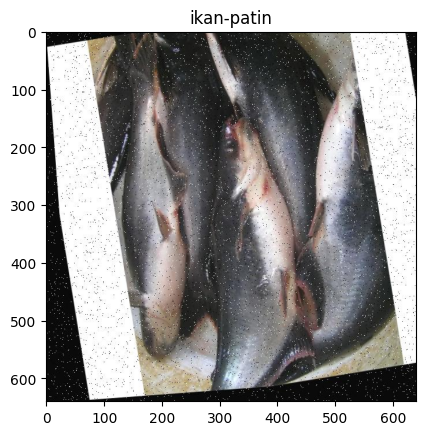

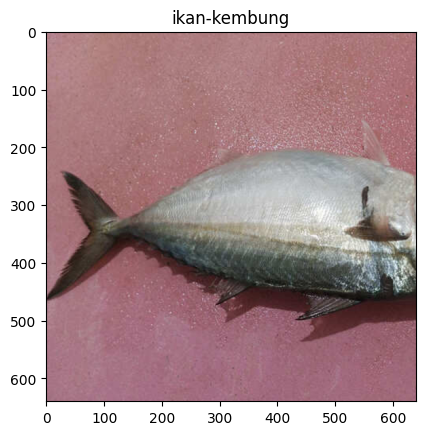

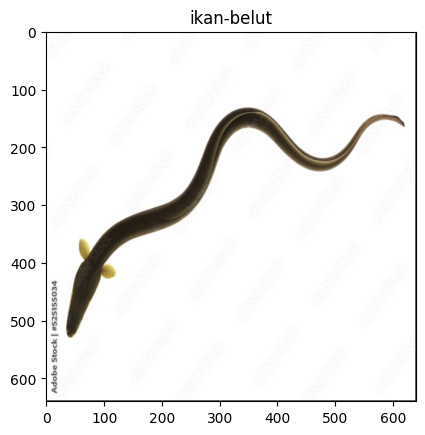

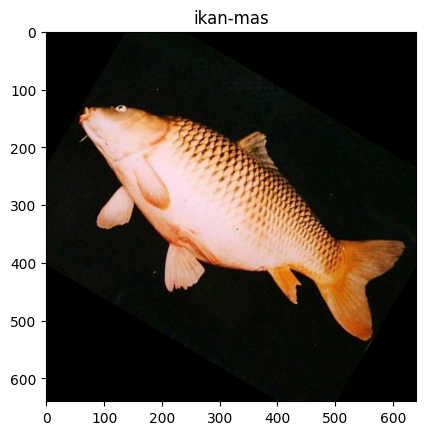

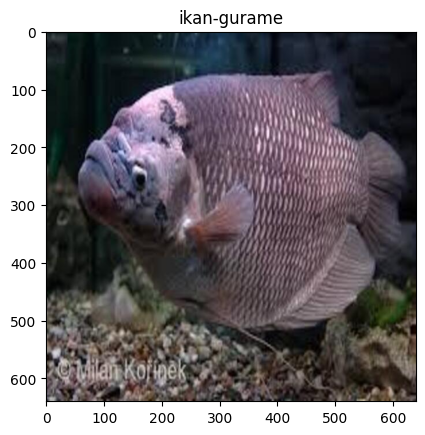

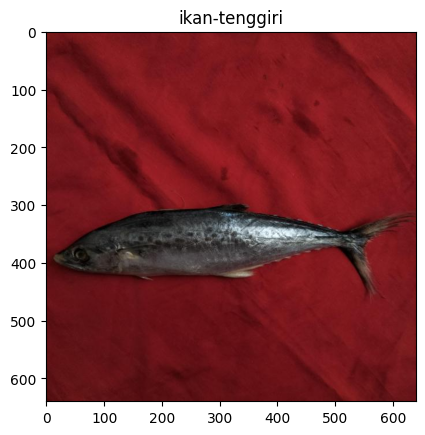

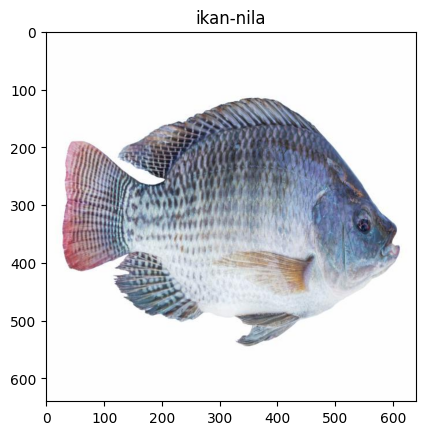

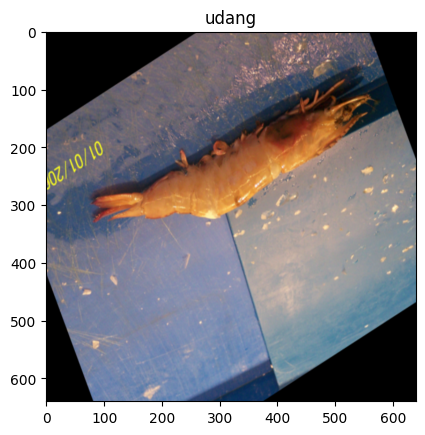

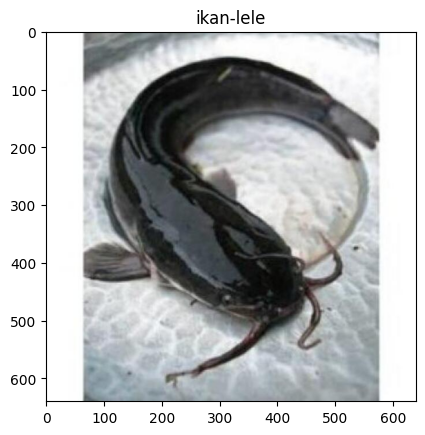

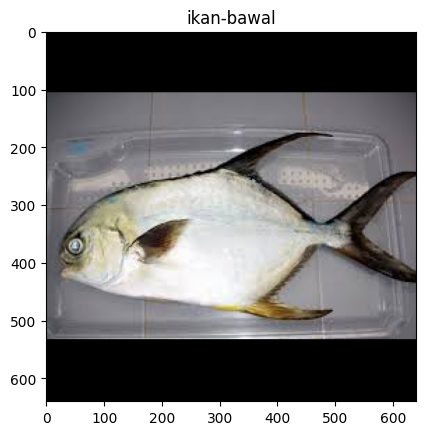

In [35]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class_dirs = [d for d in os.listdir(file_path+'train') if os.path.isdir(os.path.join(file_path+'train', d))]

for class_dir in class_dirs:
    class_dir_path = os.path.join(file_path+'train', class_dir)
    image_file = os.listdir(class_dir_path)[0]
    image_path = os.path.join(class_dir_path, image_file)

    # Muat dan tampilkan gambar
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(class_dir)
    plt.show()

#**Data normalization**

In [45]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = file_path+"train/"
training_datagen = ImageDataGenerator(
      rescale = 1.0/255.)

VALIDATION_DIR = file_path+"valid/"
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(300,300),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(300,300),
    class_mode='categorical'
)

Found 2500 images belonging to 10 classes.
Found 450 images belonging to 10 classes.


#**Model Building**

In [46]:
img_width, img_height = 300,300
batch_size = 32

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

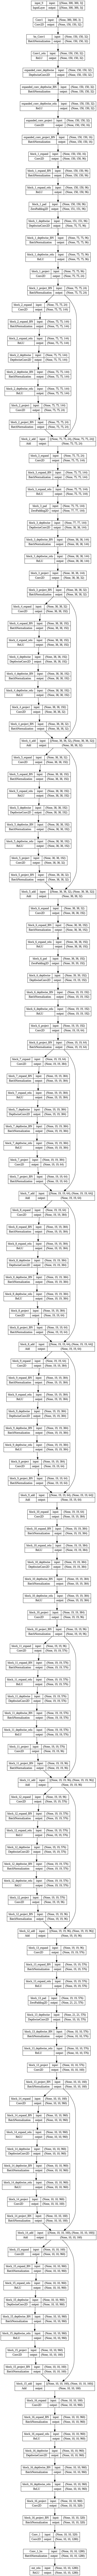

In [47]:
tf.keras.utils.plot_model(base_model, show_shapes=True)

In [48]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


for layer in base_model.layers[:100]:
    layer.trainable = False
for layer in base_model.layers[100:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Epoch 1/10
78/78 [==============================] - 35s 383ms/step - loss: 1.6833 - accuracy: 0.4733 - val_loss: 1.1945 - val_accuracy: 0.7121
Epoch 2/10
78/78 [==============================] - 29s 366ms/step - loss: 0.8984 - accuracy: 0.7468 - val_loss: 0.7944 - val_accuracy: 0.8103
Epoch 3/10
78/78 [==============================] - 29s 370ms/step - loss: 0.6276 - accuracy: 0.8246 - val_loss: 0.6400 - val_accuracy: 0.8371
Epoch 4/10
78/78 [==============================] - 29s 366ms/step - loss: 0.4875 - accuracy: 0.8651 - val_loss: 0.5314 - val_accuracy: 0.8504
Epoch 5/10
78/78 [==============================] - 29s 373ms/step - loss: 0.3933 - accuracy: 0.8922 - val_loss: 0.4963 - val_accuracy: 0.8661
Epoch 6/10
78/78 [==============================] - 29s 367ms/step - loss: 0.3320 - accuracy: 0.9121 - val_loss: 0.4495 - val_accuracy: 0.8817
Epoch 7/10
78/78 [==============================] - 29s 374ms/step - loss: 0.2836 - accuracy: 0.9279 - val_loss: 0.4167 - val_accuracy: 0.8795

In [49]:
scores = model.evaluate(validation_generator)
scores = model.evaluate(train_generator)

79/79 [==============================] - 25s 313ms/step - loss: 0.0285 - accuracy: 0.9900


In [50]:
model.save('FishiFyModelAAA.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


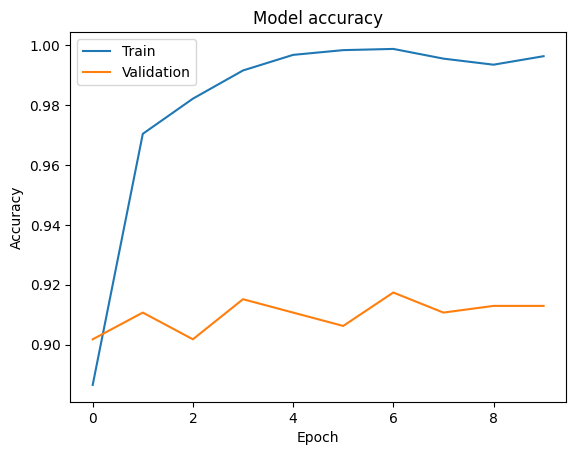

In [51]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

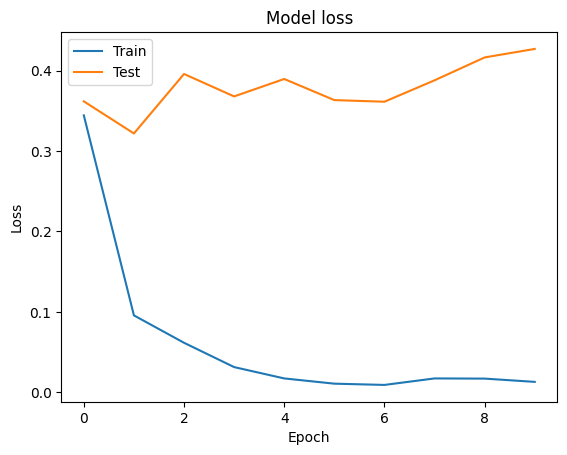

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Saving belut (10).png to belut (10).png
1/1 [==============================] - 0s 26ms/step


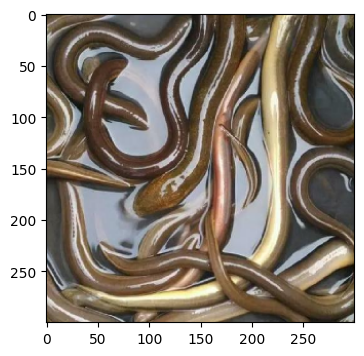

ikan-bawal: 0.00%
ikan-belut: 100.00%
ikan-gurame: 0.00%
ikan-kembung: 0.00%
ikan-lele: 0.00%
ikan-mas: 0.00%
ikan-nila: 0.00%
ikan-patin: 0.00%
ikan-tenggiri: 0.00%
udang: 0.00%


In [57]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Mendapatkan label kelas
class_labels = list(train_generator.class_indices.keys())

# Mengunggah file
uploaded_files = files.upload()

# Melakukan prediksi untuk setiap file yang diunggah
for filename in uploaded_files.keys():
    # Membuka dan memproses gambar
    img_path = filename
    img = image.load_img(img_path, target_size=(300,300))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(img_array_expanded_dims)

    # Menumpuk gambar dan melakukan prediksi
    stacked_images = np.vstack([preprocessed_img])
    probabilities = model.predict(stacked_images)[0]

    # Menampilkan gambar dan probabilitas prediksi
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.show()
    for (class_label, probability) in zip(class_labels, probabilities):
        print(f"{class_label}: {probability * 100:.2f}%")


In [58]:
model = tf.keras.models.load_model('FishiFyModelAAA.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('FishiFyModelAAA.tflite', 'wb') as f:
    f.write(tflite_model)